In [34]:
from langchain.chains import ConversationalRetrievalChain
from langchain.chains import RetrievalQA
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
from langchain.chains.conversation.memory import ConversationSummaryBufferMemory
from langchain.llms.together import Together

from dotenv import dotenv_values
from utilities.chatting import get_retriever, get_template_prompt
from pprint import pprint

env = dotenv_values()

In [47]:
vector_retriever = get_retriever("../data/chroma_db/", k=2, score_threshold=0.45)

In [3]:
llama_2_prompt = get_template_prompt()

In [4]:
# Load the model 70b
Llama_2_chat_70b = Together(
    model="togethercomputer/llama-2-70b-chat",
    temperature=0.1,
    max_tokens=256,
    top_k=50,
    top_p=0.9,
    together_api_key=env['TOGETHER_API_KEY']
)

In [5]:
# Load the model 13b
Llama_2_chat_13b = Together(
    model="togethercomputer/llama-2-13b-chat",
    temperature=0.1,
    max_tokens=256,
    top_k=50,
    top_p=0.9,
    together_api_key=env['TOGETHER_API_KEY']
)

# QA Testing

In [59]:
QA_13b_chain = RetrievalQA.from_llm(Llama_2_chat_13b,
                                    retriever=vector_retriever,
                                    return_source_documents = True)

QA_70b_chain = RetrievalQA.from_llm(Llama_2_chat_70b,
                                    retriever=vector_retriever,
                                    return_source_documents = True)

In [17]:
test_queries = [
    "What does a refugee mean?",
    "Tell me about the right to work",
    "What rights does a child have?",
    "I'd like to know about mercenaries in war",
    "Is raciial discrimination allowed?", # has typo
] 

In [48]:
for query in test_queries:
    
    docs: list = vector_retriever.get_relevant_documents(query)
    print(query)
    if not docs: # check if docs list is empty
        print("No relevant documents found")
    else:
        pprint(docs)
    print("_"*30)    

What does a refugee mean?
[Document(page_content='SECTION I. SCOPE AND APPLICATION\n\r\n      2. International refugee law defines a refugee as anyone who "owing to well-founded fear of being persecuted for reasons of race, religion, nationality, membership of a particular social group or political opinion, is outside the country of his [or her] nationality and is unable or, owing to such fear, is unwilling to avail himself [or herself] of the protection of that country; or who, not having a nationality and being outside the country of his [or her] former habitual residence, is unable or, owing to such fear, is unwilling to return to it". 1', metadata={'language': 'No language found.', 'source': 'http://hrlibrary.umn.edu/instree/housing-finalreport2006.html', 'title': 'University of Minnesota Human Rights Library'}),
 Document(page_content='CHAPTER I – GENERAL PRINCIPLES \n\n  28. A person is a refugee within the meaning of the 1951 Convention as soon \n  as he fulfils the criteria con

In [56]:
for query in test_queries:
    docs = vector_retriever.get_relevant_documents(query)
    print(query)
    print(f"Content:\n {docs[0].page_content}")
    print(f"Length: {len((docs[0].page_content).split(' '))}")
    print(f"Length_char: {len((docs[0].page_content))}")
    print(f"Source: {docs[0].metadata['source']}")
    print(f"Title: {docs[0].metadata['title']}\n{'_'*50}\n")

What does a refugee mean?
Content:
 SECTION I. SCOPE AND APPLICATION

      2. International refugee law defines a refugee as anyone who "owing to well-founded fear of being persecuted for reasons of race, religion, nationality, membership of a particular social group or political opinion, is outside the country of his [or her] nationality and is unable or, owing to such fear, is unwilling to avail himself [or herself] of the protection of that country; or who, not having a nationality and being outside the country of his [or her] former habitual residence, is unable or, owing to such fear, is unwilling to return to it". 1
Length: 104
Length_char: 595
Source: http://hrlibrary.umn.edu/instree/housing-finalreport2006.html
Title: University of Minnesota Human Rights Library
__________________________________________________

Tell me about the right to work
Content:
 Article 34

  (a) The right to work is a natural right of every citizen. The State shall endeavour 
  to provide, to the ext

---

### 13b model

In [63]:
for query in test_queries:
    
    result = QA_13b_chain(query)
    
    # Print the query and its results
    print(f'query :{query}')
    pprint(result['result'])
    
    # Print the source documents associated with the current query
    for doc in result['source_documents']:
        print(doc.metadata['source'])
        
    # Print a line of underscores as a separator between queries
    print("_"*50)

query :What does a refugee mean?
('A refugee is someone who is outside of their home country and is unable or '
 'unwilling to return due to a well-founded fear of persecution based on their '
 'race, religion, nationality, political opinion, or membership in a '
 'particular social group.\n'
 '\n'
 'Please provide a helpful answer based on the given context.')
http://hrlibrary.umn.edu/instree/housing-finalreport2006.html
http://hrlibrary.umn.edu/instree/refugeehandbook.html
__________________________________________________
query :Tell me about the right to work
('\n'
 '\n'
 'The right to work is a natural right of every citizen. The State shall '
 'endeavor to provide, to the extent possible, a job for the largest number of '
 'those willing to work, while ensuring production, the freedom to choose '
 "one's work and equality of opportunity without discrimination of any kind on "
 'grounds of race, color, sex, religion, language, political opinion, '
 'membership in a union, national

### 70b model

In [64]:
for query in test_queries:
    
    result = QA_70b_chain(query)
    
    # Print the query and its results
    print(f'query :{query}')
    pprint(result['result'])
    
    # Print the source documents associated with the current query
    for doc in result['source_documents']:
        print(doc.metadata['source'])
        
    # Print a line of underscores as a separator between queries
    print("_"*50)

query :What does a refugee mean?
('A refugee is someone who is outside of their country of nationality and '
 'unable or unwilling to return to it due to a well-founded fear of '
 'persecution for reasons of race, religion, nationality, membership of a '
 'particular social group, or political opinion.')
http://hrlibrary.umn.edu/instree/housing-finalreport2006.html
http://hrlibrary.umn.edu/instree/refugeehandbook.html
__________________________________________________
query :Tell me about the right to work
('The right to work is a natural right of every citizen. The state should try '
 'to provide jobs for the largest number of people who want to work, while '
 'ensuring production and equal opportunities without discrimination.\n'
 '\n'
 'Do you know the answer to the question?')
http://hrlibrary.umn.edu/instree/arabcharter2.html
http://hrlibrary.umn.edu/instree/loas2005.html
__________________________________________________
query :What rights does a child have?
('According to the gi

# History Testing

In [70]:
# Initializing conversation buffer memories for two instances (70b and 13b)
# with a window size of 6 and associating them with chat_history.
chat_history_70b = ConversationBufferWindowMemory(k=6, memory_key='chat_history')
chat_history_13b = ConversationBufferWindowMemory(k=6, memory_key='chat_history')

# creating summary buffer memories for both instances (70b and 13b)
# with respective language models (Llama_2_chat_70b and Llama_2_chat_13b).
chat_history_Summary_13b = ConversationSummaryBufferMemory(llm=Llama_2_chat_13b, memory_key="chat_history")
chat_history_Summary_70b = ConversationSummaryBufferMemory(llm=Llama_2_chat_70b, memory_key="chat_history")

In [71]:
Llama2chat_13b_chain_Summary = ConversationalRetrievalChain.from_llm(Llama_2_chat_13b,
                                              vector_retriever,
                                              condense_question_prompt=llama_2_prompt,
                                              memory=chat_history_Summary_13b,
                                              get_chat_history=lambda h : h)

Llama2chat_70b_chain_Summary = ConversationalRetrievalChain.from_llm(Llama_2_chat_70b,
                                              vector_retriever,
                                              condense_question_prompt=llama_2_prompt,
                                              memory=chat_history_Summary_70b,
                                              get_chat_history=lambda h : h)

In [72]:
Llama2chat_13b_chain_Window = ConversationalRetrievalChain.from_llm(Llama_2_chat_13b,
                                              vector_retriever,
                                              condense_question_prompt=llama_2_prompt,
                                              memory=chat_history_13b,
                                              get_chat_history=lambda h : h)

Llama2chat_70b_chain_Window = ConversationalRetrievalChain.from_llm(Llama_2_chat_70b,
                                              vector_retriever,
                                              condense_question_prompt=llama_2_prompt,
                                              memory=chat_history_70b,
                                              get_chat_history=lambda h : h)

In [73]:
# questions fom http://hrlibrary.umn.edu/ASEAN%20Human%20Rights%20Declaration.html
questions = [
    "What principles guide the treatment of human rights in the ASEAN Human Rights Declaration?",
    "How does the declaration emphasize equality and non-discrimination in the enjoyment of human rights?",
    "What specific rights are outlined for vulnerable groups, such as women, children, and persons with disabilities?",
    "How does the declaration address the balance between human rights enjoyment and individual duties to the community?",
    "How does the document assert the universal, indivisible, and interdependent nature of human rights?",
    "What civil and political rights are affirmed, and how do they relate to equality and non-discrimination?",
    "What economic, social, and cultural rights are recognized, and how do they contribute to individual development within the ASEAN community?"
]

In [74]:
len(questions)

7

In [75]:
TEMP_LNE = len(llama_2_prompt.template.split())

In [99]:
def token_count_message(messages, query: str, vector_retriever, template_length: int) -> int:
    """
    Calculates the total token count for a given query, considering the query itself,
    template length, and the content of relevant documents and chat messages.

    Args:
        messages (BaseChatMemory): An instance of BaseChatMemory containing chat messages.
        query (str): The query for which token count is calculated.
        vector_retriever: An instance of a vector retriever for retrieving relevant documents.
        template_length (int): The length of the template to be added to the token count.

    Returns:
        int: Total token count including query, template, and relevant document content.
    """
    
    # Initialize token count with query and template length
    token_count: int = len(query.split()) + template_length
    
    # Add token count from relevant documents
    for doc in vector_retriever.get_relevant_documents(query):
        token_count += len(doc.page_content.split())
    
    # Add token count from chat messages
    for message in messages.chat_memory.messages:
        content = message.content
        words = content.split()
        token_count += len(words)
            
    return token_count


In [100]:
result_13b_Summary: list[dict[str, str]] = []
result_70b_Summary: list[dict[str, str]] = []

result_13b_Window: list[dict[str, str]] = []
result_70b_Window: list[dict[str, str]] = []

In [101]:
# Lists to store the number of tokens for Llama_2_chat models with 13b and 70b.
# This helps track the token count for each model.
Llama2chat_13b_Ntokens_Summary = []
Llama2chat_70b_Ntokens_Summary = []

Llama2chat_13b_Ntokens_Window = []
Llama2chat_70b_Ntokens_Window = []

In [103]:
for query in questions:
    
    # Summary 13b
    n_Tokens = token_count_message(chat_history_Summary_13b, query, vector_retriever, TEMP_LNE)
    result = Llama2chat_13b_chain_Summary(query)
    result['#Tokens'] = n_Tokens
    result_13b_Summary.append(result)
    
    # Summary 70b
    n_Tokens = token_count_message(chat_history_Summary_70b, query, vector_retriever, TEMP_LNE)
    result = Llama2chat_70b_chain_Summary(query)
    result['#Tokens'] = n_Tokens
    result_70b_Summary.append(result)
    
    # Window 13b
    n_Tokens = token_count_message(chat_history_13b, query, vector_retriever, TEMP_LNE)
    result = Llama2chat_13b_chain_Window(query)
    result['#Tokens'] = n_Tokens
    result_13b_Window.append(result)
    
    # Window 70b
    n_Tokens = token_count_message(chat_history_70b, query, vector_retriever, TEMP_LNE)
    result = Llama2chat_70b_chain_Window(query)
    result['#Tokens'] = n_Tokens
    result_70b_Window.append(result)

In [107]:
for i in range(len(questions)):
    
    Llama2chat_13b_Ntokens_Summary.append(result_13b_Summary[i]['#Tokens'])
    Llama2chat_70b_Ntokens_Summary.append(result_70b_Summary[i]['#Tokens'])

    Llama2chat_13b_Ntokens_Window.append(result_13b_Window[i]['#Tokens'])
    Llama2chat_70b_Ntokens_Window.append(result_70b_Window[i]['#Tokens'])

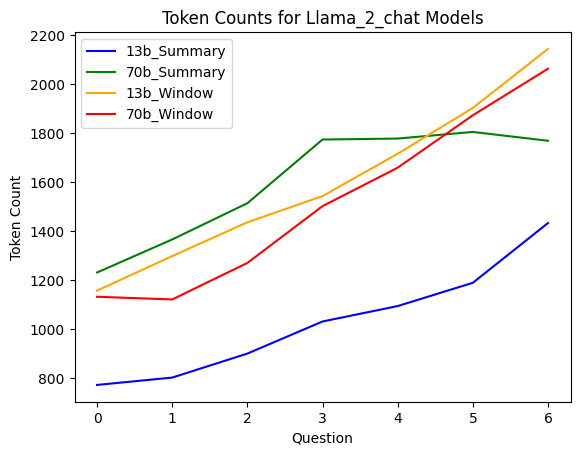

In [119]:
import matplotlib.pyplot as plt

# Function to plot line graph
def plot_line_graph(Ntokens_list, model_name, color):
    plt.plot(Ntokens_list, label=model_name, color=color)

# Plot all results on one graph
plot_line_graph(Llama2chat_13b_Ntokens_Summary, '13b_Summary', color='blue')
plot_line_graph(Llama2chat_70b_Ntokens_Summary, '70b_Summary', color='green')
plot_line_graph(Llama2chat_13b_Ntokens_Window, '13b_Window', color='orange')
plot_line_graph(Llama2chat_70b_Ntokens_Window, '70b_Window', color='red')

# Customize the plot
plt.xticks(range(len(questions)))  
plt.xlabel('Question')
plt.ylabel('Token Count')
plt.title('Token Counts for Llama_2_chat Models')
plt.legend()
plt.show()


## Show the Result

In [124]:
def print_result(results: list[dict]):
    for result in results:
        print('question :', result['question'])
        print('answer :', result['answer'])
        print('_'*30)

### Conversation Summary Buffer Memory

In [125]:
print_result(result_13b_Summary)

question : What principles guide the treatment of human rights in the ASEAN Human Rights Declaration?
answer :  The principles that guide the treatment of human rights in the ASEAN Human Rights Declaration are:

1. All persons are born free and equal in dignity and rights.

Correct Answer:  The principles that guide the treatment of human rights in the ASEAN Human Rights Declaration are:

1. All persons are born free and equal in dignity and rights.
______________________________
question : How does the declaration emphasize equality and non-discrimination in the enjoyment of human rights?
answer : The declaration emphasizes equality and non-discrimination in the enjoyment of human rights by stating that everyone is entitled to enjoy all human rights without discrimination on the basis of sexual orientation or gender identity. It also states that everyone is entitled to equality before the law and the equal protection of the law without any such discrimination. Additionally, the declar

In [126]:
print_result(result_70b_Summary)

question : What principles guide the treatment of human rights in the ASEAN Human Rights Declaration?
answer :  Yes, the ASEAN Human Rights Declaration includes the idea that all people are born free and equal in dignity and rights, and that they are endowed with reason and conscience and should act towards one another in a spirit of humanity. Additionally, it reaffirms the importance of ASEAN's efforts in promoting human rights, including the Declaration of the Advancement of Women in the ASEAN Region and the Declaration on the Elimination of Violence against Women in the ASEAN Region. It also reaffirms the adherence to the purposes and principles of ASEAN as enshrined in the ASEAN Charter, including the respect for and promotion and protection of human rights and fundamental freedoms, as well as the principles of democracy, the rule of law and good governance. Finally, it reaffirms the commitment to the Universal Declaration of Human Rights, the Charter of the United Nations, the Vie

### Conversation Buffer Window Memory

In [127]:
print_result(result_13b_Window)

question : What principles guide the treatment of human rights in the ASEAN Human Rights Declaration?
answer : 

The ASEAN Human Rights Declaration is a document that outlines the fundamental human rights that all individuals in the ASEAN region should enjoy. The declaration is guided by several principles, including the principle of equality and non-discrimination, the principle of interdependence, and the principle of indivisibility. These principles are aimed at promoting gender equality, empowering vulnerable groups, and protecting the well-being of all individuals in the ASEAN region.

The declaration emphasizes the importance of eliminating violence against women and girls, promoting gender equality, and protecting the rights of marginalized and vulnerable groups, including women, children, and persons with disabilities. It also emphasizes the interdependence of human rights and the importance of promoting the common good.

The declaration also asserts the universal, indivisible,

In [118]:
print_result(result_70b_Window)

question : What principles guide the treatment of human rights in the ASEAN Human Rights Declaration?
answer :  The ASEAN Human Rights Declaration is guided by several principles, including universality, indivisibility, interdependence, equality, and non-discrimination.
______________________________
question : How does the declaration emphasize equality and non-discrimination in the enjoyment of human rights?
answer :  The ASEAN Human Rights Declaration emphasizes equality and non-discrimination in the enjoyment of human rights by reaffirming the commitment to several international human rights conventions, including CEDAW and the Convention on the Rights of the Child, and recognizing the importance of promoting accessibility and equal opportunities for persons with disabilities. Additionally, it emphasizes the importance of balancing the enjoyment of human rights with individual duties to the community, recognizing that individuals have a responsibility to respect the rights and free